In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

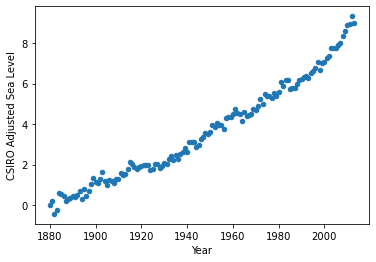

In [4]:
df.plot('Year', 'CSIRO Adjusted Sea Level', kind='scatter')

##### We will model the above equation based on the following equation:

##### $ y = \theta _{0} + \theta _{1} \cdot \sqrt{x} + \theta _{2} \cdot x^{2} $

##### The equation when graphed:

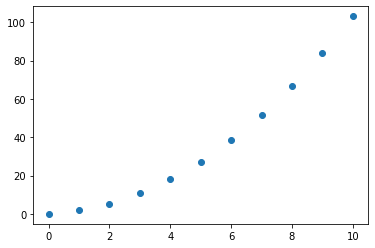

In [5]:
x = np.arange(0, 11)
plt.scatter(x, x**(1/2) + x**2)
plt.show()

### The below is an example of <font color="blue">stochastic</font> gradient descent: modify the parameter based on <font color="blue">one</font> training set, in one iteration.

In [6]:
df_amount = len(df)
t0 = 0
t1 = 0
t2 = 0
learning_rate = 0.0000005


for i in range(df_amount):
    t0 = t0 - learning_rate * (1/df_amount) * (t0 + t1 * ((df.index[i])**(1/2)) + t2 * ((df.index[i])**(2)) - df['CSIRO Adjusted Sea Level'][i] )
    t1 = t1 - learning_rate * (1/df_amount) * (t0 * ((df.index[i])**(1/2)) + t1 * (df.index[i]) + t2 * ((df.index[i])**(5/2)) - ((df.index[i])**(1/2)) * (df['CSIRO Adjusted Sea Level'][i]) )
    t2 = t2 - learning_rate * (1/df_amount) * (t0 * ((df.index[i])**(2)) + t1 * ((df.index[i])**(5/2)) + t2 * ((df.index[i])**(4)) - ((df.index[i])**(2)) * (df['CSIRO Adjusted Sea Level'][i]) )
    
print(t0)
print(t1)
print(t2)

2.9755118526049447e-07
1.8364352498689882e-06
0.0005027535708534357


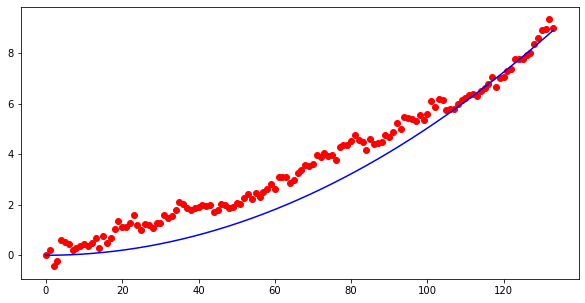

In [7]:
x = np.arange(0, df_amount)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, t0  + t1*(x**(1/2)) + t2*(x**2), c = 'blue')
ax.scatter(x, df['CSIRO Adjusted Sea Level'], c = 'red')
plt.show()

##### If we were to predict the sea level at, for example, 2050.

##### The last year on here is 2014, which is the 133rd element. 2050 is 2014 + 36, so 2050 is 133 + 36 = 169

In [8]:
print(t0  + t1*(169**(1/2)) + t2*(169**2))

14.35916890835441


##### The predicted sea level in 2050 would be approximately 14 units.

### Now we attempt a <font color="blue"> batch </font> gradient descent: where we modify the parameter based on a <font color="blue"> sum of the whole training set </font> in one iteration.

##### In this one, I will also take out the (1/df_size), to test the difference.

In [9]:
def sum_training_set_t0(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 + theta1 * ((df.index[i])**(1/2)) + theta2 * ((df.index[i])**(2)) - df['CSIRO Adjusted Sea Level'][i] )
        
    return sum_value
        

In [10]:
def sum_training_set_t1(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 * ((df.index[i])**(1/2)) + theta1 * (df.index[i]) + theta2 * ((df.index[i])**(5/2)) - ((df.index[i])**(1/2)) * (df['CSIRO Adjusted Sea Level'][i]) )
        
    return sum_value

In [11]:
def sum_training_set_t2(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 * ((df.index[i])**(2)) + theta1 * ((df.index[i])**(5/2)) + theta2 * ((df.index[i])**(4)) - ((df.index[i])**(2)) * (df['CSIRO Adjusted Sea Level'][i]) )
        
    return sum_value

In [12]:
df_amount = len(df)
t0 = 0
t1 = 0
t2 = 0
learning_rate = 0.000000000003


for i in range(1000):
    t0 = t0 - learning_rate * sum_training_set_t0(t0, t1, t2)
    t1 = t1 - learning_rate * sum_training_set_t1(t0, t1, t2)
    t2 = t2 - learning_rate * sum_training_set_t2(t0, t1, t2)
    
print(t0)
print(t1)
print(t2)

2.1770071705801734e-07
1.4671196005817184e-06
0.0005467569870868304


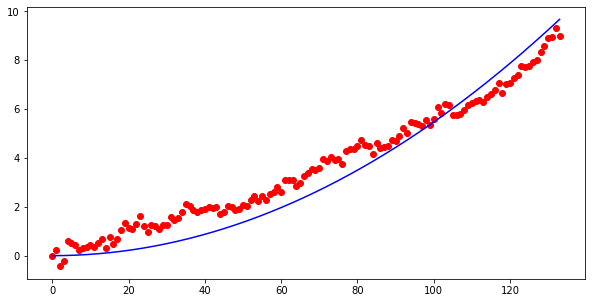

In [13]:
x = np.arange(0, df_amount)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, t0  + t1*(x**(1/2)) + t2*(x**2), c = 'blue')
ax.scatter(x, df['CSIRO Adjusted Sea Level'], c = 'red')
plt.show()

In [14]:
print(t0  + t1*(169**(1/2)) + t2*(169**2))

15.615945598442487


In [15]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Lets try to predict the sea level in 2050 with locally weighted regression instead.

##### For locally weighted regression:


##### We want to minimize the following function:

$ \frac{1}{2m} \displaystyle \sum _{i=1} ^{m} w^{(i)} \cdot [h_{\theta}(x) - y^{(i)}] $ where $ h_{\theta}(x) = \theta ^{T} x $ and $ w^{(i)} = e^{\frac{-(x^{(i)} - x)^{2}}{2u^{2}}} $ 

$ \theta ^{T} x = \theta _{0} + \theta _{1} x $

##### The 'x' in $ w^{(i)} $ is I believe the 'x' we want to predict.

##### In $ w^{(i)} $ 'u' determines how wide or narrow the window is for factoring other data points.

##### Minimizing this would require us to take the partial derivatives with respect to all the $ \theta $ parameters (only 2) :

##### The partial derivative with respect to $ \theta _{0} = \frac{1}{m} \displaystyle \sum _{i=1} ^{m} e^{\frac{-(x^{(i)} - x)^{2}}{2u^{2}}} \cdot (\theta _{0} + \theta _{1} x^{(i)} - y^{(i)})  $

##### The partial derivative with respect to $ \theta _{1} = \frac{1}{m} \displaystyle \sum _{i=1} ^{m} x^{(i)} \cdot e^{\frac{-(x^{(i)} - x)^{2}}{2u^{2}}} \cdot (\theta _{0} + \theta _{1} x^{(i)} - y^{(i)})  $

In [16]:
def sum_through_data_locally_weighted_t0(M, X, T0, T1, xi, yi, U):
    import math
    s = 0
    for i in range(M):
        s += math.e**( (-(xi[i] - X)**2) / 2*(u**2) ) * (t0 + t1*xi[i] - yi[i] )
    
    return s

In [17]:
def sum_through_data_locally_weighted_t1(M, X, T0, T1, xi, yi, U):
    import math
    s = 0
    for i in range(M):
        s += xi[i] * (math.e**( (-(xi[i] - X)**2) / 2*(u**2) )) * (t0 + t1*xi[i] - yi[i] )
    
    return s

In [18]:
m = len(df)
t0 = 0
t1 = 0
u = 0.101
lr = 0.01
x = 169  # 2050 would be the 169th index.
    
for i in range(1000):
    t0 = t0 - lr * (1/m) * sum_through_data_locally_weighted_t0(m, x, t0, t1, df.index.values, df['CSIRO Adjusted Sea Level'], u)
    t1 = t1 - lr * (1/m) * sum_through_data_locally_weighted_t1(m, x, t0, t1, df.index.values, df['CSIRO Adjusted Sea Level'], u)

print(t0)
print(t1)

0.0005146450372530868
0.0675919410265953


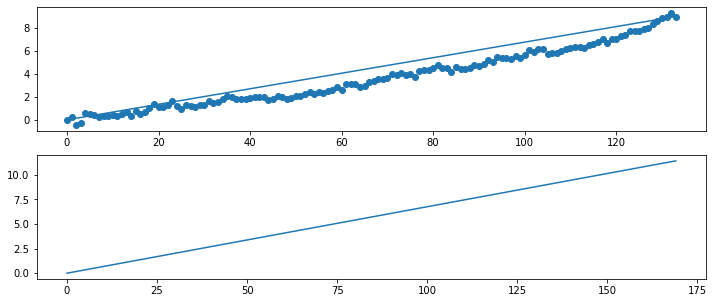

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (12, 5))
x = range(170)

ax[0].scatter(df.index.values, df['CSIRO Adjusted Sea Level'])
ax[0].plot(df.index.values, t0 + t1*(df.index.values))
ax[1].plot(x, t0 + t1*x)

##### The predicted sea level in 2050 would be:

In [20]:
t0 + t1*169

11.423552678531859

### Lets try to make the prediction using SciKit Learn

In [21]:
from sklearn.linear_model import LinearRegression

In [34]:
mod = LinearRegression()

In [36]:
mod.fit(df['Year'], df['CSIRO Adjusted Sea Level'])

ValueError: Expected 2D array, got 1D array instead:
array=[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### The solution to the above error:

In [39]:
df['Year'].shape

(134,)

##### Notice that the shape has no value for the 2nd element after the comma.

##### To fix this, change the array to a numpy array, then reshape it to (-1, 1) as the error suggests.

In [74]:
X = np.array(df['Year'])

In [75]:
type(X)

numpy.ndarray

In [76]:
X = X.reshape(-1, 1)

In [77]:
X.shape

(134, 1)

In [78]:
X.ndim

2

##### Error fixed :)

In [79]:
mod.fit(X, df['CSIRO Adjusted Sea Level'])

LinearRegression()

In [80]:
np.arange(2014, 2051)

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050])

In [81]:
X_prediction = np.append(X, values=np.arange(2014, 2051))

In [82]:
X_prediction

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 20

In [84]:
X_prediction = X_prediction.reshape(-1, 1)

In [85]:
mod.predict(X_prediction)

array([-0.54212402, -0.47907944, -0.41603486, -0.35299027, -0.28994569,
       -0.2269011 , -0.16385652, -0.10081194, -0.03776735,  0.02527723,
        0.08832182,  0.1513664 ,  0.21441098,  0.27745557,  0.34050015,
        0.40354474,  0.46658932,  0.5296339 ,  0.59267849,  0.65572307,
        0.71876766,  0.78181224,  0.84485682,  0.90790141,  0.97094599,
        1.03399058,  1.09703516,  1.16007974,  1.22312433,  1.28616891,
        1.3492135 ,  1.41225808,  1.47530266,  1.53834725,  1.60139183,
        1.66443642,  1.727481  ,  1.79052558,  1.85357017,  1.91661475,
        1.97965934,  2.04270392,  2.1057485 ,  2.16879309,  2.23183767,
        2.29488226,  2.35792684,  2.42097142,  2.48401601,  2.54706059,
        2.61010518,  2.67314976,  2.73619434,  2.79923893,  2.86228351,
        2.9253281 ,  2.98837268,  3.05141726,  3.11446185,  3.17750643,
        3.24055102,  3.3035956 ,  3.36664018,  3.42968477,  3.49272935,
        3.55577394,  3.61881852,  3.6818631 ,  3.74490769,  3.80

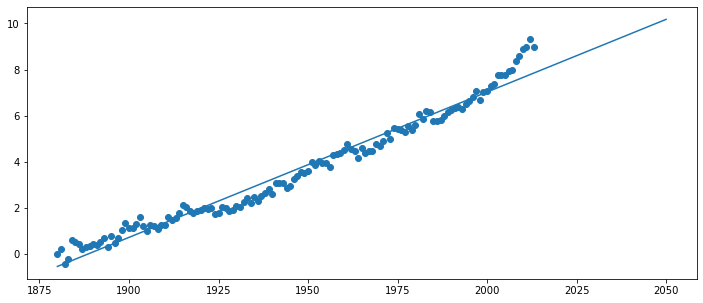

In [91]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(X_prediction, mod.predict(X_prediction))
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])